# Machine Learning Indonesian.AI
Pertemuan - 7 Clustering

## Download Package

In [1]:
! pip install opendatasets

## Libraries

In [71]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import opendatasets as od

plt.style.use('ggplot')

### Download Datasets

In [5]:
od.download('https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tnnz20
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 1.55k/1.55k [00:00<00:00, 791kB/s]

## Data Loading

In [6]:
df = pd.read_csv('customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Exploratory Data Analysis

### Total data

In [7]:
print(f'Total Data : {df.shape[0]}')
print(f'Total Column : {df.shape[1]}')

Total Data : 200
Total Column : 5


### Description  

In [9]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='Feature Data_Type Null_num Null_pct Unique_num Unique_Sample'.split())
desc_df

,Feature,Data_Type,Null_num,Null_pct,Unique_num,Unique_Sample
0,CustomerID,int64,0,0.0,200,"[1, 2, 3, 4, 5]"
1,Gender,object,0,0.0,2,"[Male, Female]"
2,Age,int64,0,0.0,51,"[19, 21, 20, 23, 31]"
3,Annual Income (k$),int64,0,0.0,64,"[15, 16, 17, 18, 19]"
4,Spending Score (1-100),int64,0,0.0,84,"[39, 81, 6, 77, 40]"


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


### Check skewnes

In [49]:
df.skew().round(3)

CustomerID                0.000
Age                       0.486
Annual Income (k$)        0.322
Spending Score (1-100)   -0.047
dtype: float64

### Univariate

#### Numeric Feature

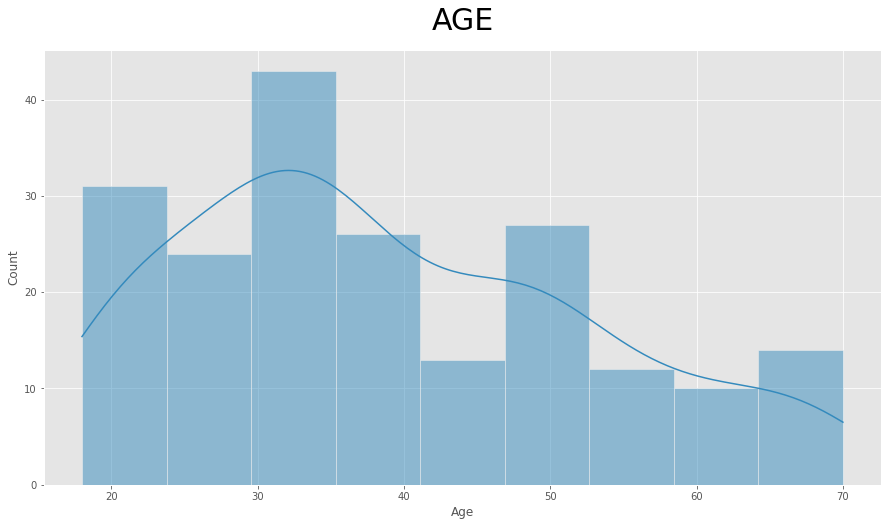

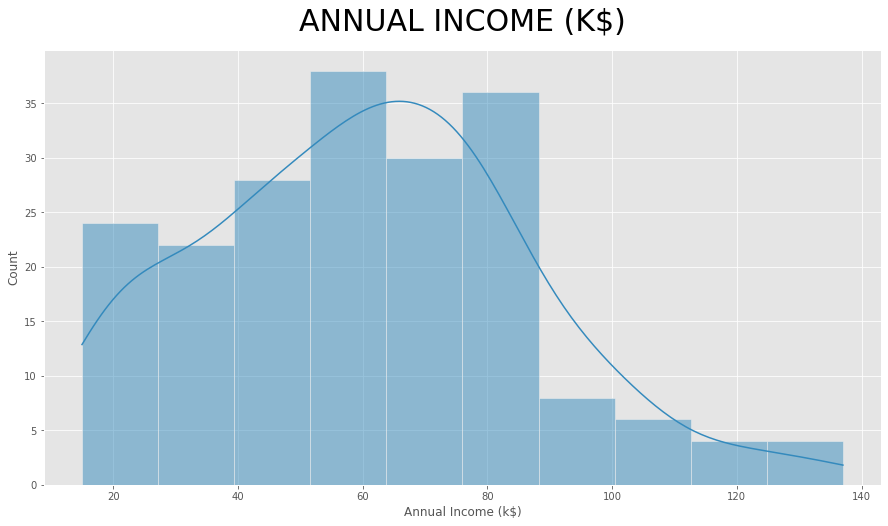

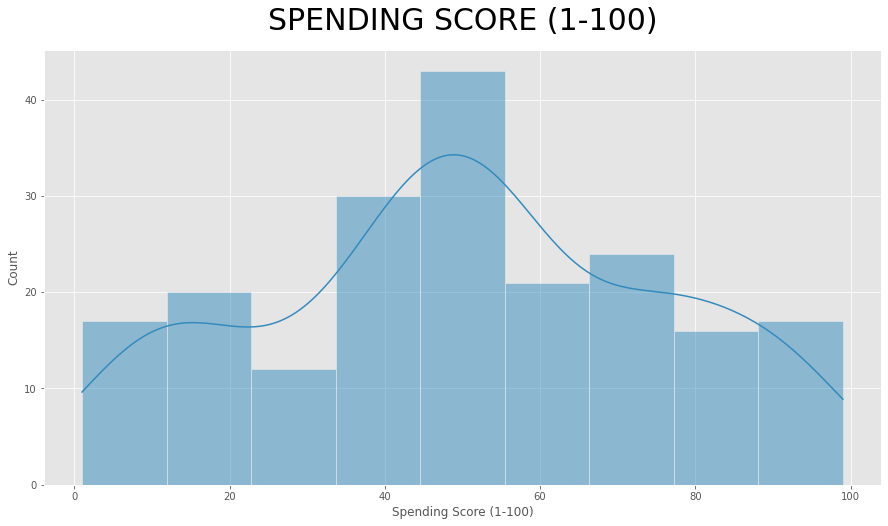

In [36]:
columns = df.drop(['CustomerID', 'Gender'], axis=1)

for column in columns.columns:
    plt.figure(figsize=(15,8))
    sns.histplot( x=df[column], kde=True)
    plt.title(column.upper(), fontsize=30, pad=20)
    plt.show()

#### feature Gender

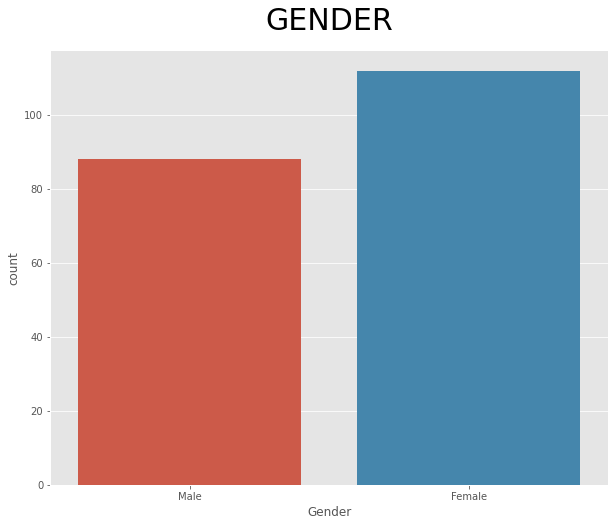

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(data=df , x='Gender')
plt.title('Gender'.upper(), fontsize=30, pad=20)
plt.show()

In [32]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

### Multivariate

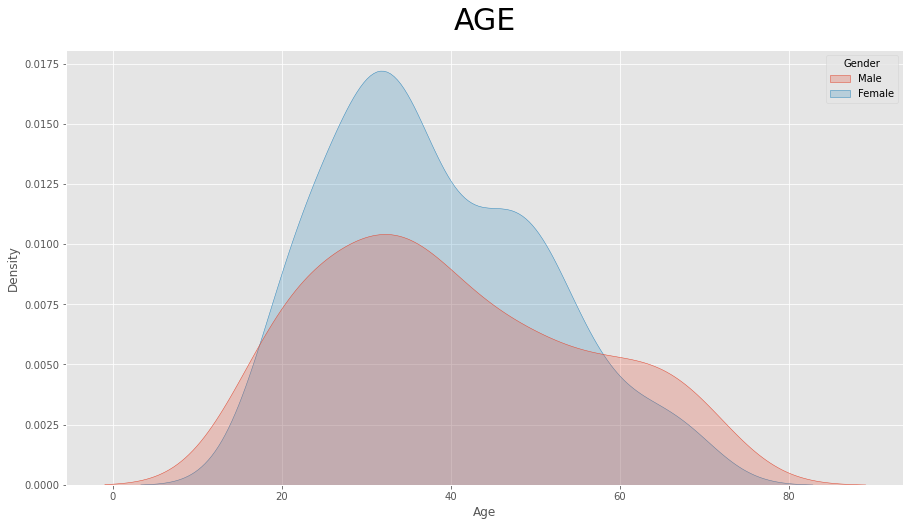

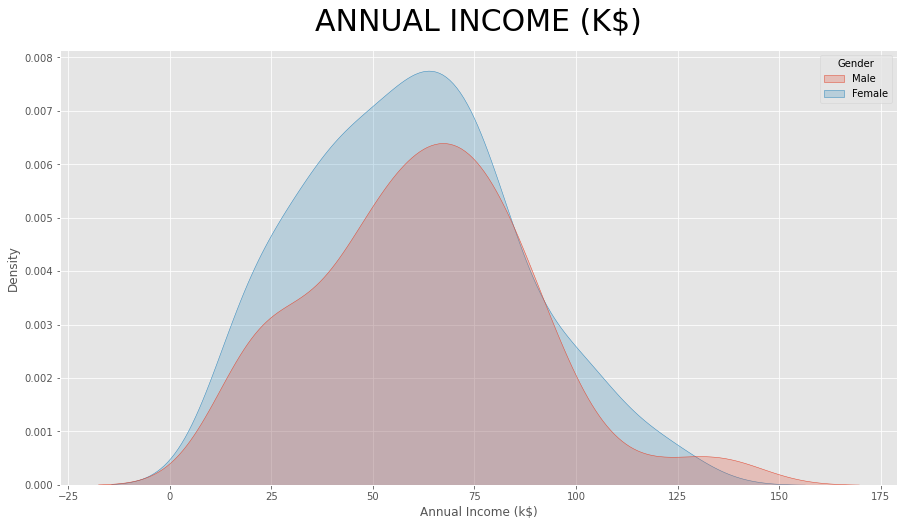

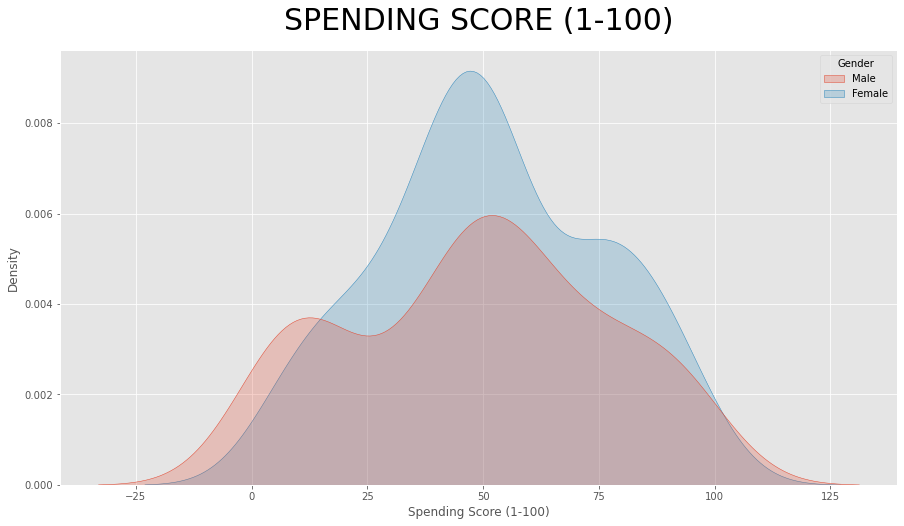

In [38]:
for column in columns:
    plt.figure(figsize=(15,8))
    sns.kdeplot(df[column], shade=True, hue=df['Gender'])
    plt.title(column.upper(), fontsize=30, pad=20)
    plt.show()

### Bivariate

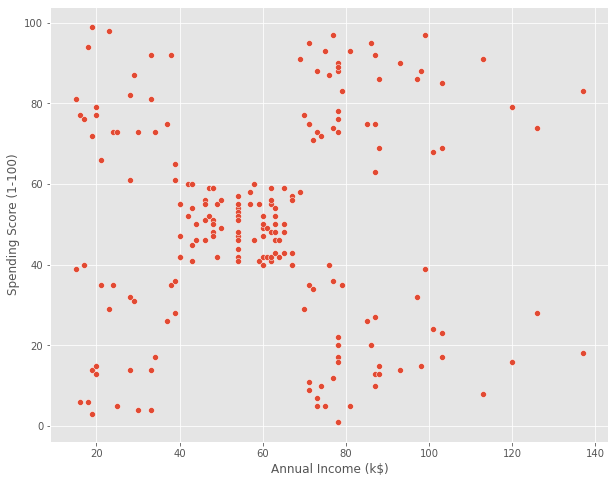

In [40]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Annual Income (k$)', y = 'Spending Score (1-100)')
plt.show()

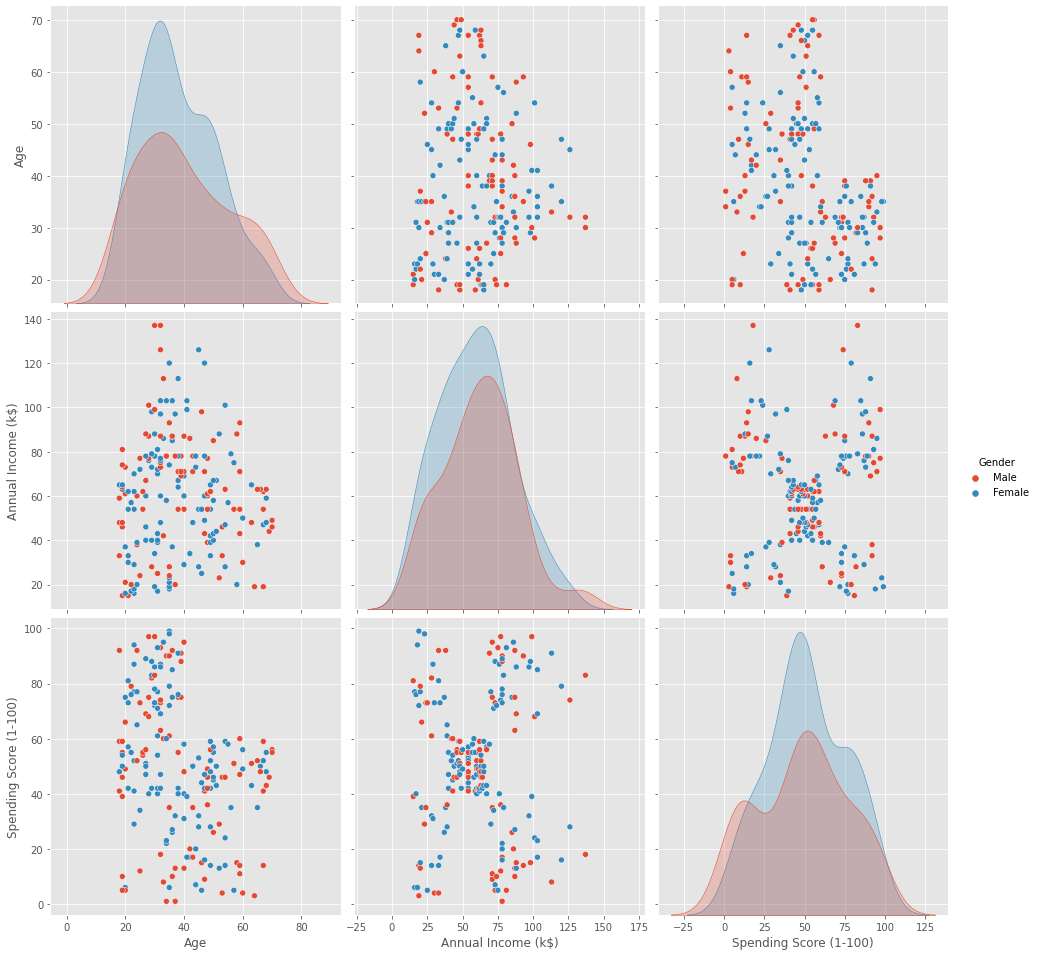

In [63]:
sns.pairplot(df.drop('CustomerID',axis=1), hue='Gender', height=4.5)
plt.show()

### Check Outliers

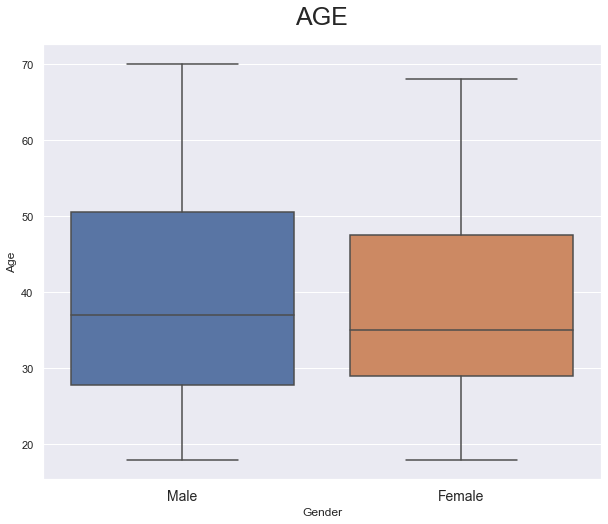

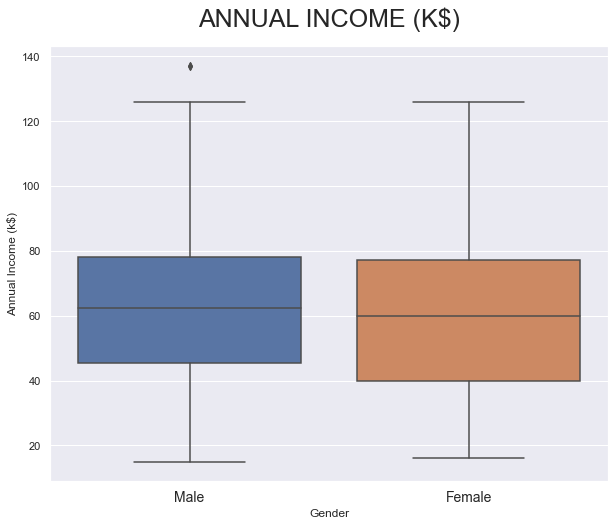

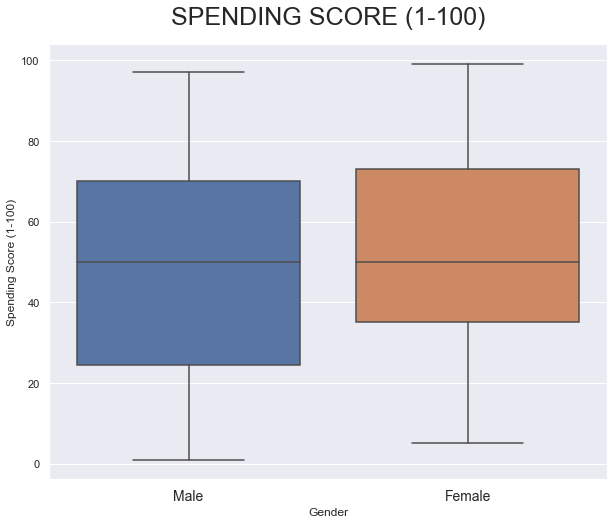

In [67]:
columns = df.drop(['CustomerID', 'Gender'], axis=1)
for column in columns.columns:
    sns.set(rc={"figure.figsize":(10, 8)})
    sns.boxplot(data=df, x='Gender', y=column)
    plt.title(column.upper().replace('_', ' '), fontsize=25, pad=20)
    plt.xticks(size=14)
    plt.show()

**Note :** We can see from the distribution and the boxplot, there are some outlier Annual Income data in Male gender feature.

### Check Corelation

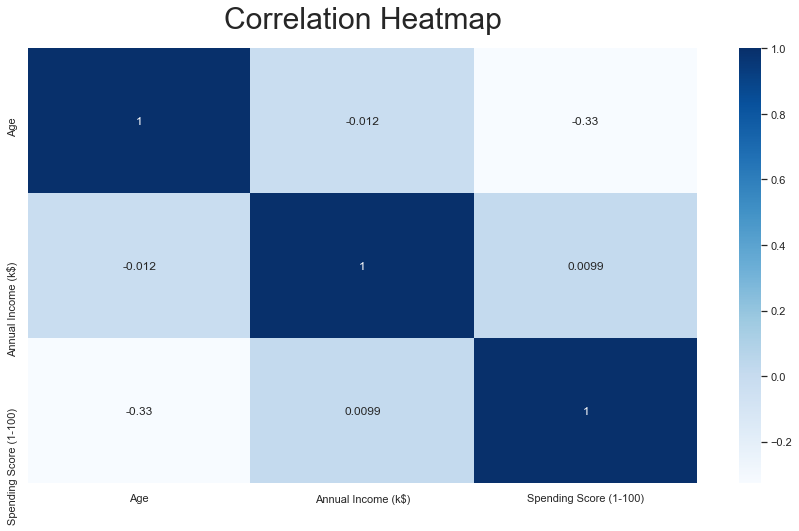

In [68]:
correlation = df.drop('CustomerID', axis=1)
correlation = correlation.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=correlation, annot=True, cmap='Blues')
plt.title('Correlation Heatmap', fontsize=30, pad=20)
plt.show()

## Data Preparation

Drop feature CustomerID we dont need it

In [69]:
df.drop('CustomerID', axis=1, inplace=True)

## Clustering

In [70]:
from sklearn.cluster import KMeans

### Univariate Clustering

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


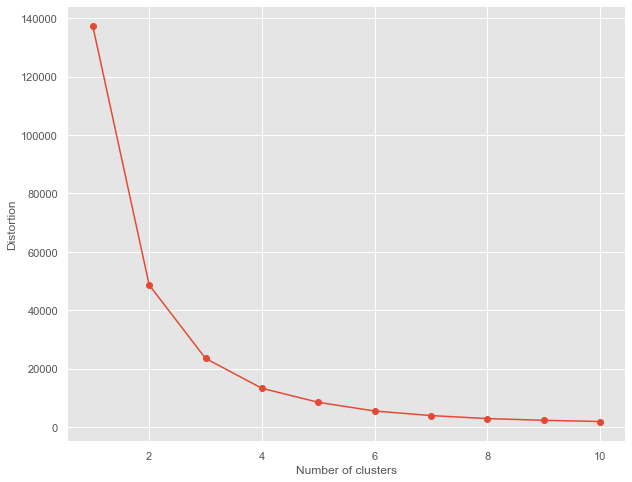

In [72]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df[['Annual Income (k$)']])
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [73]:
distortions

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5503.407059314959,
 3941.41636141636,
 2906.603601953602,
 2318.5187423687435,
 1897.3911088911086]

**Note :** Based on the elbow method, the distortion value has no significant decrease in number of cluster 3 to 4. So in this univariate cluster, we will use 3 customer cluster.

In [84]:
# initiate clustering model with single feature

uni_clustering = KMeans(n_clusters=3)

In [85]:
# fitting model with Annual Income feature

uni_clustering.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [86]:
uni_clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [87]:
df['Income Cluster'] = uni_clustering.labels_
df.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
195,Female,35,120,79,2
196,Female,45,126,28,2
197,Male,32,126,74,2
198,Male,32,137,18,2
199,Male,30,137,83,2


In [88]:
df['Income Cluster'].value_counts()

0    90
1    74
2    36
Name: Income Cluster, dtype: int64

In [93]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [120]:
centers = pd.DataFrame(uni_clustering.cluster_centers_, columns = ['x', 'y'])
centers

ValueError: Shape of passed values is (3, 1), indices imply (3, 2)

### Bivariate Clustering

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


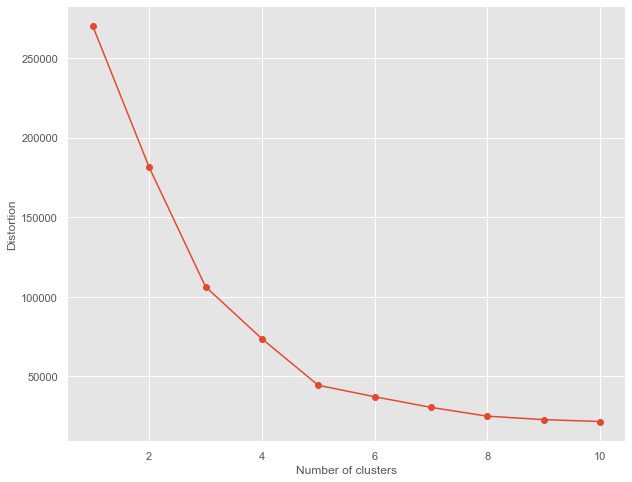

In [94]:
distortions = []
for i in range(1, 11):
    km2 = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    distortions.append(km2.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [95]:
distortions

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30566.45113025185,
 25044.96776401891,
 22882.62510164751,
 21679.308894593785]

**Note :** Based on the elbow method, the distortion value has no significant decrease in number of cluster 5 to 6. So in this bivariate cluster, we will use 5 customer cluster.

In [96]:
# initiate clustering model with dual feature

bi_clustering = KMeans(n_clusters=5)

In [97]:
# fitting model with Annual Income and Spending Score features

bi_clustering.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5)

In [98]:
bi_clustering.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [99]:
df['Income and SpendScore Cluster'] = bi_clustering.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and SpendScore Cluster
0,Male,19,15,39,1,2
1,Male,21,15,81,1,3
2,Female,20,16,6,1,2
3,Female,23,16,77,1,3
4,Female,31,17,40,1,2


In [100]:
df['Income and SpendScore Cluster'].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: Income and SpendScore Cluster, dtype: int64

In [101]:
pd.crosstab(df['Income and SpendScore Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Income and SpendScore Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.608696,0.391304
3,0.590909,0.409091
4,0.538462,0.461538


In [103]:
df.groupby('Income and SpendScore Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income and SpendScore Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,32.692308,86.538462,82.128205


In [104]:
centers = pd.DataFrame(bi_clustering.cluster_centers_, columns = ['x', 'y'])
centers

,x,y
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205


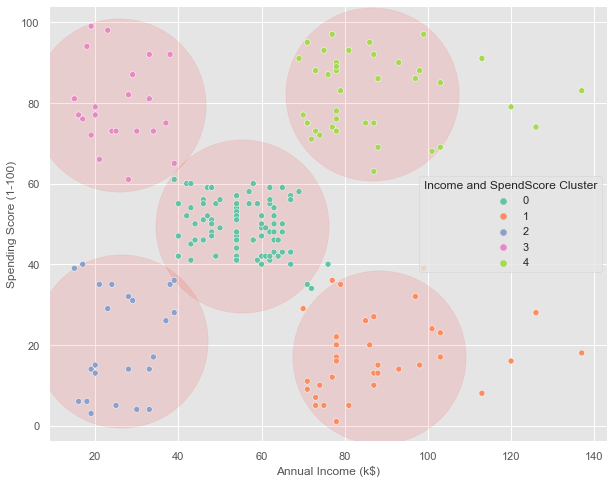

In [105]:
plt.figure(figsize = (10,8))
plt.scatter(x = centers['x'], y = centers['y'], s=30000, c='red', marker='o', alpha=0.1)
sns.scatterplot(data=df, x='Annual Income (k$)', 
                y = 'Spending Score (1-100)', 
                hue = 'Income and SpendScore Cluster', 
                palette= 'Set2')
plt.show()

### Multivariate Clustering

In [107]:
new_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [109]:
new_df = pd.DataFrame(scaler.fit_transform(new_df))

In [110]:
new_df.head()

,0,1,2
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


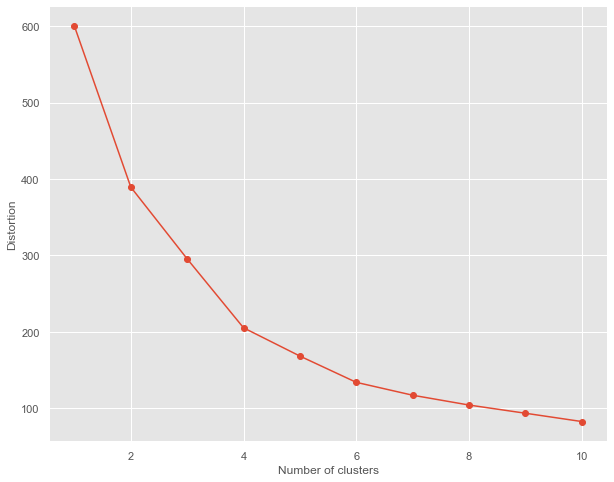

In [111]:
distortions = []
for i in range(1, 11):
    km3 = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km3.fit(new_df)
    distortions.append(km3.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [112]:
distortions

[599.9999999999999,
 389.38618895643714,
 295.4562449213557,
 205.22514747675913,
 168.2475801755683,
 133.86833362685582,
 117.01155455889815,
 104.15429882343577,
 93.43389510231614,
 82.56630324624444]

In [113]:
# initiate clustering model

multi_clustering = KMeans(n_clusters=4)

In [114]:
# fitting model with all features

multi_clustering.fit(new_df)

KMeans(n_clusters=4)

In [115]:
multi_clustering.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 3, 0, 0, 0, 2, 2, 2, 2, 0, 3, 1, 1, 3, 1, 3, 1, 2, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [116]:
df['All Features Cluster'] = multi_clustering.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and SpendScore Cluster,All Features Cluster
0,Male,19,15,39,1,2,0
1,Male,21,15,81,1,3,0
2,Female,20,16,6,1,2,0
3,Female,23,16,77,1,3,0
4,Female,31,17,40,1,2,0


In [117]:
df['All Features Cluster'].value_counts()

2    65
0    57
1    40
3    38
Name: All Features Cluster, dtype: int64

In [118]:
df.groupby('All Features Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
All Features Cluster,,,
0,25.438596,40.000000,60.298246
1,32.875000,86.100000,81.525000
2,53.984615,47.707692,39.969231
3,39.368421,86.500000,19.578947
